# Pipeline to (re)produce figures for rt-me-fMRI methods article

## Imports

In [8]:
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import glob
import os
from IPython.display import display, set_matplotlib_formats
import nibabel as nib
from nilearn import plotting
from nilearn.image import load_img
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate
from plotly.colors import sequential, n_colors
import plotly.graph_objs as go
from bids import BIDSLayout
from nilearn.image.image import mean_img


## 1. Signal intensity

/Users/jheunis/miniconda3/envs/rtme-fmri/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)


NameError: name 'html_vies' is not defined

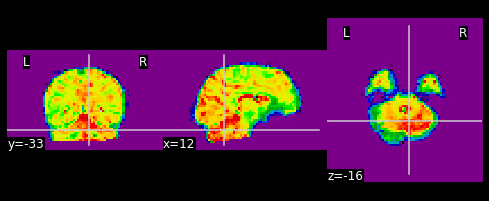

In [9]:
bids_dir = '/Volumes/TSM/NEUFEPME_data_BIDS'
deriv_dir = os.path.join(bids_dir, 'derivatives')
preproc_dir = os.path.join(deriv_dir, 'fmrwhy-preproc')
qc_dir = os.path.join(deriv_dir, 'fmrwhy-qc')
me_dir = os.path.join(deriv_dir, 'fmrwhy-multiecho')
asset_dir = '/Users/jheunis/Documents/Websites/rt-me-fmri-dash/assets/'
dash_dir = '/Users/jheunis/Documents/Websites/rt-me-fmri-dash/'
dash_bids_dir = '/Users/jheunis/Documents/Websites/rt-me-fmri-dash/bids'
dash_deriv_dir = '/Users/jheunis/Documents/Websites/rt-me-fmri-dash/bids/derivatives'
dash_qc_dir = '/Users/jheunis/Documents/Websites/rt-me-fmri-dash/bids/derivatives/fmrwhy-qc'
dash_me_dir = '/Users/jheunis/Documents/Websites/rt-me-fmri-dash/bids/derivatives/fmrwhy-multiecho'

tasks = ['rest', 'fingerTapping', 'emotionProcessing', 'fingerTappingImagined', 'emotionProcessingImagined']
tasksruns = ['rest_run-1', 'fingerTapping', 'emotionProcessing', 'rest_run-2', 'fingerTappingImagined', 'emotionProcessingImagined']
rest_runs = ['1', '2']
cols_tasksruns = ['rest 1', 'motor 1', 'emotion 1', 'rest 2', 'motor 2', 'emotion 2']
cols_stats = ['tSNR_mean_GM', 'tSNR_mean_WM', 'tSNR_mean_CSF', 'tSNR_mean_brain', 'zscore_mean', 'gcor']
# df_fdmean = pd.DataFrame(columns=cols_tasksruns)
# df_fdsum = pd.DataFrame(columns=cols_tasksruns)
# df_tsnrgm = pd.DataFrame(columns=cols_tasksruns)
this_sub = ['sub-001']

# for sub in this_sub:
#     for taskrun in tasksruns:
#         print(sub)
sub = this_sub[0];
taskrun = tasksruns[4]


bold_fn = os.path.join(me_dir, sub, 'func', sub + '_task-' + taskrun + '_desc-combinedMEt2star_bold.nii')
mean_bold = mean_img(bold_fn)
koek = plotting.plot_epi(mean_bold)

tsnr_fn = os.path.join(me_dir, sub, 'func', sub + '_task-' + taskrun + '_echo-2_space-MNI152_desc-rapreproc_tsnr.nii')
html_fn = os.path.join(dash_me_dir, sub, sub + '_task-' + taskrun + '_echo-2_space-MNI152_desc-rapreproc_tsnr.html')
img_title = 'tSNR'
tsnr_img = load_img(tsnr_fn)
html_view = plotting.view_img(tsnr_img, bg_img=False, cut_coords=[2, -16, 20], title=img_title, black_bg=True, vmax=255)
html_view